In [2]:
#github: https://github.com/0000LRhinehart/Project-1-Data-Analytics


In [3]:
__author__ = "Luke Rhinehart"
__version__ = "Fall 2023"
__pylint__ = "Version 3.11.4"

In [4]:
"""import modules and create dataframe"""
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('spotify-2023.csv')
# data from https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

print("shape", df.shape)
print(df.head(10))


shape (953, 24)
                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1      

In [5]:
'''The dataset used is an overview of the top songs on Spotify and comprises 943 of the top tracks from the site.
This includes information about the track such as its name, the artists who feature on it, how many artists are on
it and the year, month and day it was released on. There is data about how common the song is by streams on Spotify
and how frequent it is in playlists and charts on Spotify along with other music platforms, Apple Music, Deezer, and
Shazam. This includes musical aspects of the song such as the bpm, key and mod along with percentages evaluating
danceability, valence, energy, acousticness, instrumentalness, liveness and speechiness.

What overall trends exist in the releases of the songs in spotify’s top charts? The main things that could affect
popularity are when it is released, it is sensible for more recent songs to be more popular than older songs, the artist,
a more famous artist will most likely have more songs in the topping charts, and the attributes of a song, usually more
lively, poppy music is commonly played on the radio.

What is the percentage of songs from each year? The percentage can be used to evaluate how common a year is.
This is essential in being able to tell how the year affects a song’s popularity. Does this favor recent releases or
older releases? This will test if the top charts are consistent throughout or if certain groups are favored differently
among popularity. A pie chart will be created for this query.

What are the most common artists within the top songs? Will tally the appearances of all artists in the top songs and
evaluate them against each other. Artists with below 5 songs in the top charts will be removed to provide
better understandability and to show the more common artists more. A bar graph will be created for this query.

What qualities such as danceability, valence, or speechiness  are preferred in a song? This will test to see
the most common values for danceability, liveness, etc. These will find both the average with outliers removed and
the mode of each category. Two bar graphs will be created for this query.
'''

'The dataset used is an overview of the top songs on Spotify and comprises 943 of the top tracks from the site.\nThis includes information about the track such as its name, the artists who feature on it, how many artists are on\nit and the year, month and day it was released on. There is data about how common the song is by streams on Spotify\nand how frequent it is in playlists and charts on Spotify along with other music platforms, Apple Music, Deezer, and\nShazam. This includes musical aspects of the song such as the bpm, key and mod along with percentages evaluating\ndanceability, valence, energy, acousticness, instrumentalness, liveness and speechiness.\n\nWhat overall trends exist in the releases of the songs in spotify’s top charts? The main things that could affect\npopularity are when it is released, it is sensible for more recent songs to be more popular than older songs, the artist,\na more famous artist will most likely have more songs in the topping charts, and the attribu

shape (953, 10)


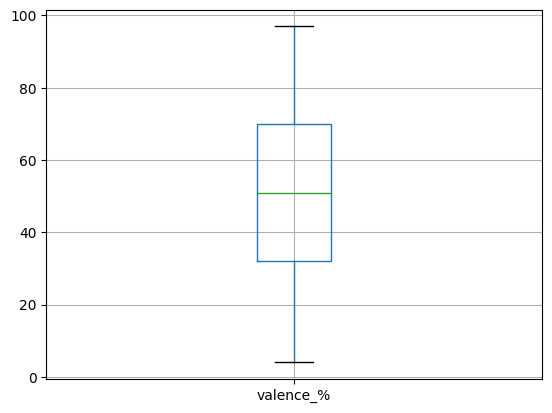

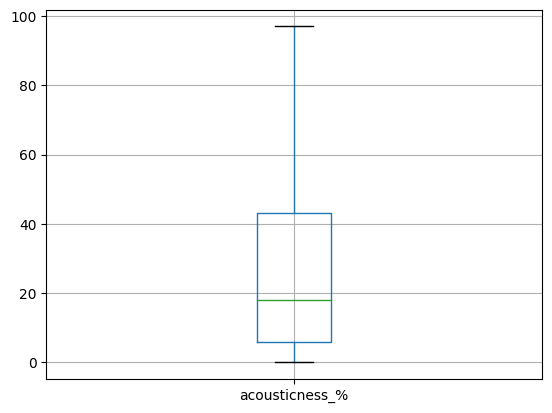

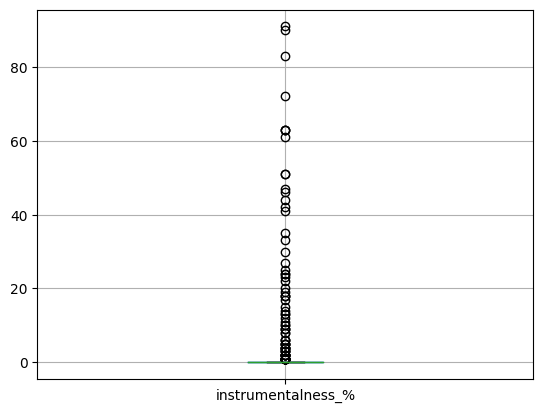

In [13]:
"""Data Cleaning"""
df_artist_year_attributes = df[['track_name','artist(s)_name','released_year','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]


"""Check and drop all missing values"""

df_artist_year_attributes_less = df_artist_year_attributes.dropna()

print("shape", df_artist_year_attributes_less.shape)


"""Check for and remove outliers"""

#outliers for danceability
df_filtered_dance = df_artist_year_attributes[df_artist_year_attributes['danceability_%'] > 27]



#outliers for energy
df_filtered_energy = df_artist_year_attributes[df_artist_year_attributes['energy_%'] > 27]

#show boxplot for in valence. this displayed no outliers
df_artist_year_attributes.boxplot(column=['valence_%'])
plt.show()

#show boxplot for in valence. this displayed no outliers
df_artist_year_attributes.boxplot(column=['acousticness_%'])
plt.show()

#show boxplot for in instrumentalness
df_artist_year_attributes.boxplot(column=['instrumentalness_%'])
plt.show()

#outliers for liveness
df_filtered_liveness = df_artist_year_attributes_less[(df_artist_year_attributes_less["liveness_%"] < 45)]

#outliers for speechiness
df_filtered_speechiness = df_artist_year_attributes_less[(df_artist_year_attributes_less["speechiness_%"] < 20)]


    released_year  track_name
43           2017          23
45           2019          36
46           2020          37
47           2021         119
48           2022         402
49           2023         175


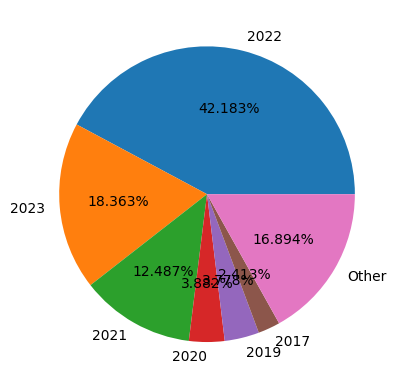

In [7]:
"""Question A"""

#Set pandas to display decimal values up to 3 places 
pd.set_option('display.float_format', '{:.3f}'.format)


#create pivot table and get highest values
table_years = pd.pivot_table(df_artist_year_attributes, values=['track_name'], index=['released_year'], aggfunc={'track_name': "count"})

table_years_index = table_years.reset_index()

table_years_less = table_years_index[table_years_index['track_name'] > 20.0]

print(table_years_less)

#create row for all other values
other_sum = table_years_index[table_years_index['track_name'] <= 20.0].sum()

other_row = pd.DataFrame([{'released_year':"Other",'track_name':other_sum[1]}])


#sort largest values and add the new row
table_years_sort = table_years_less.sort_values(by='track_name',ascending=False)

table_years_full = pd.concat([table_years_sort,other_row], sort=False, ignore_index=True)


#Create pie chart

plt.pie(table_years_full.iloc[:, 1], labels=table_years_full.iloc[:, 0], autopct='%1.3f%%')

plt.show()

In [8]:
'''Question A shows that more recent years are favored with somewhat surprisingly the previous year,
2022, takes over 40 percent which is followed by the current year 2023 and then 2021, from there
it drops off where the next largest year 2020 has barely over 3%. The oldest year to escape
the others category is 2017 with 2.4%. All other years comprised 16.9% which
is less than both 2022 and 2023, the first and second largest categories.
This clearly shows more recent music is favored by a far margin in the top charts.
'''

'Question A shows that more recent years are favored with somewhat surprisingly the previous year,\n2022, takes over 40 percent which is followed by the current year 2023 and then 2021, from there\nit drops off where the next largest year 2020 has barely over 3%. The oldest year to escape\nthe others category is 2017 with 2.4%. All other years comprised 16.9% which\nis less than both 2022 and 2023, the first and second largest categories.\nThis clearly shows more recent music is favored by a far margin in the top charts.\n'

                  track_name
artist(s)_name              
BTS                        8
Bad Bunny                 19
Doja Cat                   6
Drake, 21 Savage           8
Ed Sheeran                 9
Feid                       8
Harry Styles              17
Kendrick Lamar            12
Labrinth                   7
Morgan Wallen             11
NewJeans                   6
Olivia Rodrigo             7
SZA                       19
Taylor Swift              34
The Weeknd                22


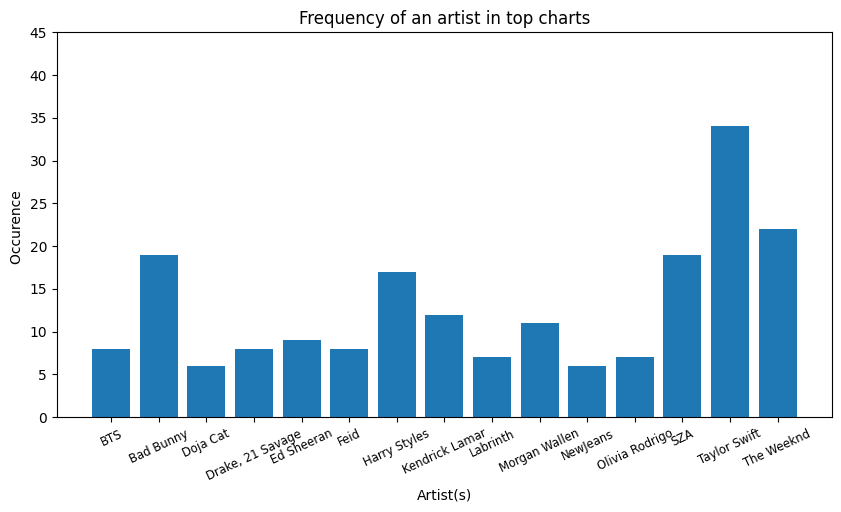

In [9]:
"""Question B"""

'''create table'''
table_artist_count = pd.pivot_table(df_artist_year_attributes, values=['track_name'], index=['artist(s)_name'], aggfunc={'track_name': "count"})

table_artist_top = table_artist_count[table_artist_count['track_name'] > 5]

print(table_artist_top)

'''create bar graph'''

plt.figure(figsize=(10,5))

plt.bar(table_artist_top.index, table_artist_top.iloc[:, 0] )

plt.title('Frequency of an artist in top charts')
plt.xlabel('Artist(s)')
plt.ylabel('Occurence ')

plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 15, step=1),rotation=25,size='small')

plt.show()

In [10]:
'''Question C shows what the most common artist throughout the dataset is Taylor Swift with
34 songs in the top charts. As for the rest of the top 5, she was followed by The Weeknd with 22,
SZA and Bad Bunny both with 19, and Harry Styles with 17. From there the two artists with between
15 and 10 songs in the top charts are, in order, Kendrick Lamar with 12 and Morgan Wallen with 11.
The artists with below 10 songs but above 5 are in order: Ed Sheeran with 9; BTS, Drake and 21 Savage,
and Feid tied with 8; Labrinth and Olivia Rodrigo tied with 7; and finally Doja cat and NewJeans tied with 6.'''

''

['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
                      0
danceability     67.148
valence          51.431
energy           65.233
acousticness     27.058
instrumentalness  0.000
liveness         16.002
speechiness       6.269
                   0
danceability      70
valence           24
energy            74
acousticness       0
instrumentalness   0
liveness          11
speechiness        4


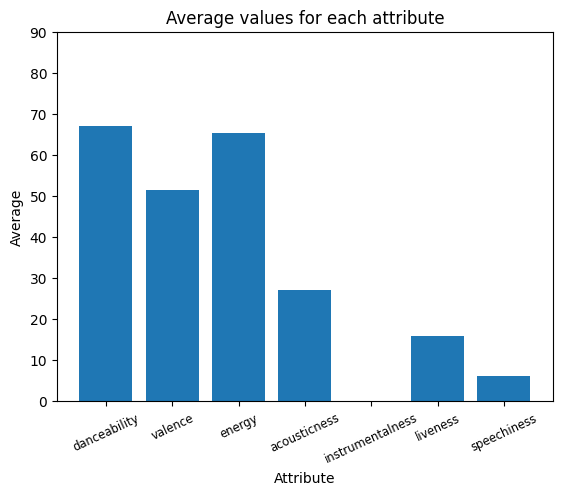

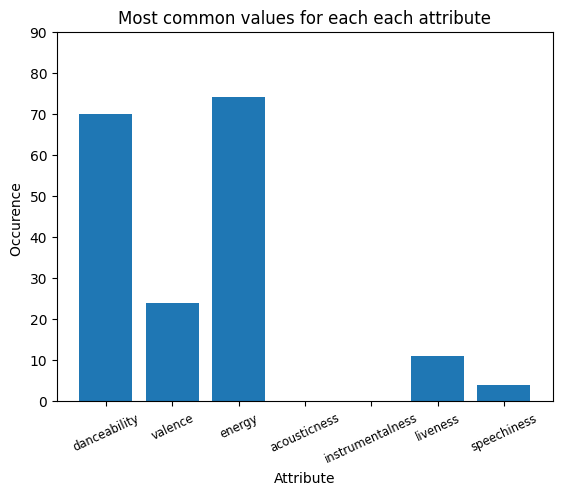

In [14]:
"""Question C"""

#get averages for each attrbute of the tracks

df_dance_average = df_filtered_dance['danceability_%'].mean()

df_valence_average = df_artist_year_attributes['valence_%'].mean()

df_energy_average = df_filtered_energy['energy_%'].mean()

df_acousticness_average = df_artist_year_attributes['acousticness_%'].mean()

df_instrumentalness_average = 0

df_liveness_average = df_filtered_liveness['liveness_%'].mean()

df_speechiness_average = df_filtered_speechiness['speechiness_%'].mean()

averages = [df_dance_average,df_valence_average,df_energy_average,df_acousticness_average,df_instrumentalness_average,df_liveness_average,df_speechiness_average]
attributes = ['danceability', 'valence', 'energy', 'acousticness','instrumentalness', 'liveness', 'speechiness']

print(attributes)

df_attribute_averages = pd.DataFrame(averages,index=attributes)

print(df_attribute_averages)

df_dance_mode = df_artist_year_attributes['danceability_%'].mode()

df_valence_mode = df_artist_year_attributes['valence_%'].mode()

df_energy_mode = df_artist_year_attributes['energy_%'].mode()

df_acousticness_mode = df_artist_year_attributes['acousticness_%'].mode()

df_instrumentalness_mode = df_artist_year_attributes['instrumentalness_%'].mode()

df_liveness_mode = df_artist_year_attributes['liveness_%'].mode()

df_speechiness_mode = df_artist_year_attributes['speechiness_%'].mode()

modes = [df_dance_mode,df_valence_mode,df_energy_mode,df_acousticness_mode,df_instrumentalness_mode,df_liveness_mode,df_speechiness_mode]

df_attribute_modes = pd.DataFrame(modes,index=attributes)

print(df_attribute_modes)

'''Create Bar Graph for averages'''
plt.bar(attributes, df_attribute_averages.iloc[:, 0])

plt.title('Average values for each attribute')
plt.xlabel('Attribute')
plt.ylabel('Average')

plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(0, 7, step=1),rotation=25,size='small')

plt.show()


'''Create Bar Graph for mode values'''
plt.bar(attributes, df_attribute_modes.iloc[:, 0])

plt.title('Most common values for each each attribute')
plt.xlabel('Attribute')
plt.ylabel('Occurence ')

plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(0, 7, step=1),rotation=25,size='small')

plt.show()

In [ ]:
'''Question C shows what the most apparent attribute is throughout the dataset.
The instrumentalness’s boxplot provided no values within its fence and was all outliers.
For the averages graph, it was replaced with zero as that was its mode value. The two highest values,
danceability and energy, are the same for both graphs; however danceability is slightly higher on
the averages and lower on the modes. From there valence is third in both graphs however differs from
an average of 51.4% compared to a mode of 24%. The only major placing difference comes next with accousticness having
an average of 19.8% and a mode of 0. The next values, in order, liveness and speechiness are rather
consistent between the two with a less than 5% difference between the two graphs.'''

In [ ]:
''' referenced https://stackoverflow.com/questions/66969078/set-decimal-precision-of-a-pandas-dataframe-column-with-a-datatype-of-decimal,
    https://stackoverflow.com/questions/61715264/python-rearrange-order-of-labels-in-pie-chart,
    https://stackoverflow.com/questions/6230457/setting-bar-spacing-in-a-matplotlib-bar-plot,
    '''